[Google Colab Notebook](https://colab.research.google.com/drive/1ebtUmUJWTu_wngIHlm05Bo3cokVUdjld#scrollTo=XIUhK_IbjLBG)

# Import necessary libraries



In [33]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

# Get the data



In [4]:
# Problem parameters
num_classes = 10
input_shape = (28, 28, 1)

# Split into training and testing
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Visualizing the data

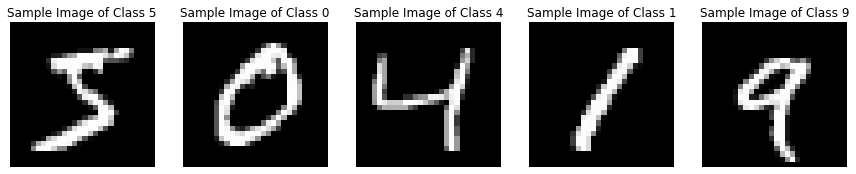

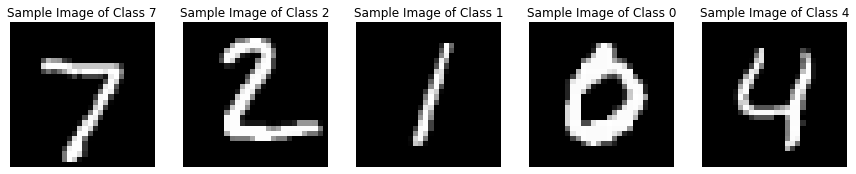

In [5]:
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('Sample Image of Class {}'.format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis("off")
plt.show()
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('Sample Image of Class {}'.format(y_test[i]))
    plt.imshow(x_test[i], cmap='gray')
    plt.axis("off")
plt.show()

# Prepare the data

In [6]:
# Standard Normalization to have mean = 0 and std = 1
x_train = (x_train - np.mean(x_train))/ np.std(x_train)
x_test = (x_test - np.mean(x_test))/ np.std(x_test)


# Reshape into TF format (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# Convert labels into one-hot encodings (3 = [0 0 1 0 0 0 0 0 0 0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Build the model

Convolutional layers tend to be used in the first layers

Pooling layers are used to reduce the size of the features while keeping most of the information

Batch normalization layers are used to make it easier for optimization

Flatten layers reshape the data into a single vector.

Dropout layers are used only in training to reduce overfitting.

Dense layers are fully connected layers (like in a standard ANN).



In [34]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters = 32, kernel_size=(3, 3), activation="relu"), #,kernel_regularizer=regularizers.l2(0.0001)
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters = 64, kernel_size=(5, 5), activation="relu"), #,kernel_regularizer=regularizers.l2(0.0001)
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2),),
        layers.Flatten(),
        layers.Dropout(rate = 0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_17 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
batch_normalization_18 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)             

# Train the model

Cross entropy is the function that will be optimized: https://gombru.github.io/2018/05/23/cross_entropy_loss/

Adam is the optimization algorithm used to find the weights: https://ruder.io/optimizing-gradient-descent/index.html#adam

The learning rate commands how much the weights are updated: https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

In [35]:
batch_size = 128
epochs = 15
opt = keras.optimizers.Adam(learning_rate=0.01, beta_1 = 0.9)
loss_fn = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss_fn, optimizer=opt, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 5s 11ms/step - loss: 0.4473 - accuracy: 0.9064 - val_loss: 0.1059 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0972 - accuracy: 0.9807 - val_loss: 0.0866 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0823 - accuracy: 0.9841 - val_loss: 0.0972 - val_accuracy: 0.9813
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0826 - accuracy: 0.9846 - val_loss: 0.0799 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0882 - accuracy: 0.9839 - val_loss: 0.0793 - val_accuracy: 0.9892
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0943 - accuracy: 0.9834 - val_loss: 0.0903 - val_accuracy: 0.9860
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0907 - accuracy: 0.9846 - val_loss: 0.1031 - val_accuracy: 0.9847

# Evaluate the trained model

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08370407670736313
Test accuracy: 0.986299991607666
